<a href="https://colab.research.google.com/github/Marcosmpassos/vacina/blob/main/vacina_coleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy

In [ ]:
pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

In [ ]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [ ]:
consumer_key= 'b8jJDB1JcytP60u7PCoR5JRqf'
consumer_secret= 'zwWKLjViWQEFz9jgxMQemBiTpZ0btUDyMK7yTeAegkymsj67vI'
access_token= '1229456782612979713-FPqZqs2hSWsCMJ90SdWui45IBjQnvD'
access_token_secret= 'v4Y7pp0R1xF7oJosXIcnNzrFFfAmNH6PeiGCJPKdJ4JJL'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "vacina" + "-filter:retweets"

In [ ]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="pt-br",).items(5000)

In [ ]:
tweets

In [ ]:
all_tweets = [tweet.text for tweet in tweets]

In [ ]:
all_tweets

['o corretor tinha corrigido pra beijar, pena que tamo na pandemia né mas espera só chegar minha vacina… https://t.co/yIMx7dShEy',
 'n vejo a hr dos meus pais tomarem a 2ºdose da vacina pra eles viajarem pra bem longe e eu poder fazer festa aqui em casa',
 'O Brasil mesmo em queda na média de mortos perde mais de 1.000 vidas por dia para uma doença com vacina há mais set… https://t.co/IoZGc6ZY95',
 'e a vontade de tomar a vacina so aumenta https://t.co/UrjKT98C0k',
 'INCLUSIVE QUEM CANTOU JUNTO VACINA SEMANA QUE VEM HEIN',
 '@zeluizlhesdiz Assassinos profissionais... propineiros de vacina amadores.',
 'Eu não estava nem um pouco seletiva pois o importante era conseguir tomar a vacina pelo menos... \nMaaas.... https://t.co/N0fVnd2cWt',
 'Só eu que a acho que a vacina do COVID tinha que ficar uma marquinha pra sempre igual BCG \nPorque pra mim é como um… https://t.co/11BqyBiVBQ',
 '@RomeiraEduardo De nada. 36 países usam a coronavac, que recebeu aval da OMS Nós fabricamos essa vacina (em

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

In [ ]:
tweets_no_urls

['o corretor tinha corrigido pra beijar pena que tamo na pandemia n mas espera s chegar minha vacina',
 'n vejo a hr dos meus pais tomarem a 2dose da vacina pra eles viajarem pra bem longe e eu poder fazer festa aqui em casa',
 'O Brasil mesmo em queda na mdia de mortos perde mais de 1000 vidas por dia para uma doena com vacina h mais set',
 'e a vontade de tomar a vacina so aumenta',
 'INCLUSIVE QUEM CANTOU JUNTO VACINA SEMANA QUE VEM HEIN',
 'zeluizlhesdiz Assassinos profissionais propineiros de vacina amadores',
 'Eu no estava nem um pouco seletiva pois o importante era conseguir tomar a vacina pelo menos Maaas',
 'S eu que a acho que a vacina do COVID tinha que ficar uma marquinha pra sempre igual BCG Porque pra mim como um',
 'RomeiraEduardo De nada 36 pases usam a coronavac que recebeu aval da OMS Ns fabricamos essa vacina em parceri',
 'arthurpicoli Voc precisa cuidar da sua sadeessa tosse nariz entupido J tomou a vacina da gripe No d mole',
 'Puts vou ter que ser sommelier de v

In [ ]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

In [ ]:
words_in_tweet

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [ ]:
tweets_nsw

In [ ]:
# Remove collection words
collection_words = [ 'vacina', 'não', 'nao','faz', 'tudo', 'quer',
                        'aqui', 'sim', 'dias', 'ainda', 
                        'pode', 'pra', 'para', 'gente', 
                        'sao', 'assim', 'ver', 'deve', 
                        'porque', 'todos', 'todas', 
                        'fazer', 'onde', 'estao', 'hoje', 
                        'pouco', 'f09f9898','ser', 'sao', 
                        'dia', 'voce', 'vai', 'sobre', 
                        'pode', 'diz', 'nada', 'apenas', 
                        'cada', 'bom', 'mundo', 'todo', 
                        'nunca', 'mim','voces', 'via', 
                        'campcisa', 'bem', 'vez', 'maior', 
                        'semana', 'grande','menos', 'agora', 
                        'dar', 'momento', 'todo', 'ter', 
                        'outros', 'anos', 'dia', 'noite', 
                        'boa', 'nesta', 'vou', 'neste', 'tarde', 
                        'manha', 'nesse', 'sempre', 'melhor', 'tomar',
                        'q', 's', 't', 'j', 'dose', 'n', 'quero', 'amanh',
                    'tomei', 'pq', 'to', 'tomou', 'vc', 'out', 'est',
                    '1', 'voc', 'doses', 'at', 'segunda', 'brao', 'd', 'so', 
                    'p', 'tomo', 'pessoa', 'antes', 'cara', 'primeira',
                    'pessoas', 'contra', 'ficar', 'reao', 'ento', 'nto', 
                    'ir', 'vem' , 'queria', 'l', 'ta', 'dessa', 'sei',
                     'agr', 'duas', '2', 'toma', 'pois', 'esto', 'tanto', 'vo',
                     'acho', 'falando', 'pro', 'causa', 'coisa', 'ai', 'tava', 'hora',
                    'casa', 'toda', 'vacinas', 'preciso', 'ia', 'sabe', 'milhes', 'covid', 'algum', 'perfil', 'vi', 'algum', 'baseado',
                     'v', 'tambm', 'vrus', 'covid19', 'pandemia', 'porra', 'vacinao' ]

In [ ]:

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw_nc

In [ ]:
# Process for word counts
all_words_nsw = list(itertools.chain(*tweets_nsw_nc))

counts_nsw = collections.Counter(all_words_nsw)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(30),
                             columns=['words', 'count'])
clean_tweets_nsw

,words,count
0,pfizer,248
1,escolher,217
2,bolsonaro,115
3,sommelier,104
4,mclalaodotds,97
5,brasil,95
6,deus,87
7,gripe,82
8,peito,75
9,povo,75


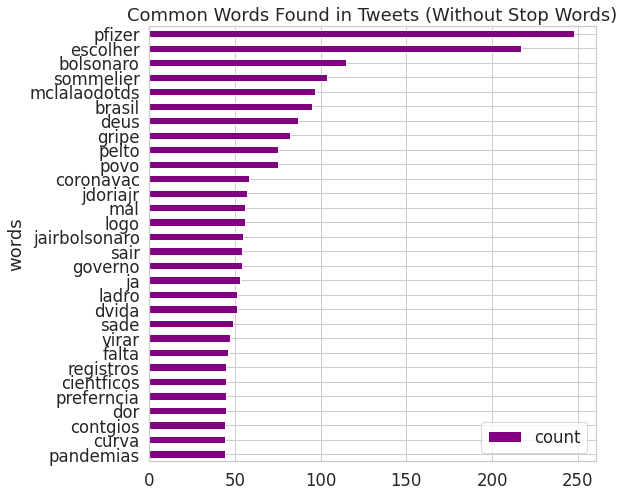

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()